- mnist를 DNN으로 구현 :  https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input 
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print([0, 0])
print(data[0, 1:].reshape(28,28))

(785,)
[0, 0]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 19

In [4]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [5]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

5.0

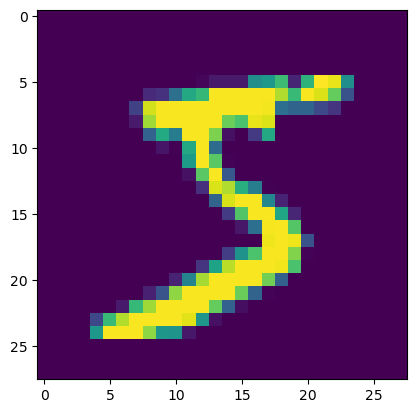

In [6]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

# 1. 데이터 생성 & 전처리

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

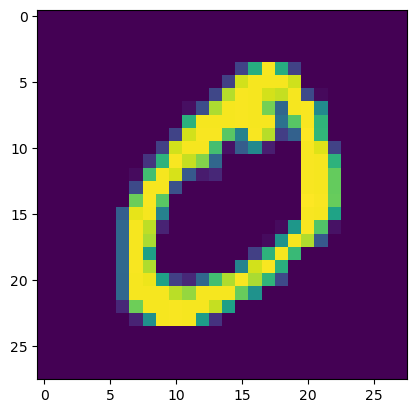

In [9]:
plt.plot(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [10]:
Y_train[1]

0

In [11]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
# 검증셋을(만개) 하기위해 X_train, Y_train 을 다시 재정의
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [12]:
# 훈련시(학습시 사용), 검증셋(fit에서 사용), 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [13]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정 (255.0으로 나눠)
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [14]:
# 훈련셋(5만개)과 검증셋 (만개) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700) # 비복원 추출은 자동 중복값제외
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

8


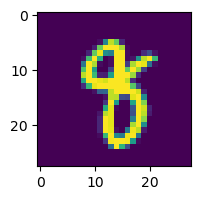

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(-1, 28))
print(Y_train[0])
plt.show()

In [16]:
# 종속변수 전처리 : 원핫인코딩 (to_categorical(넘파이배열), pd.get_dummies(데이터프레임))
print('원핫인코딩 전 shape :' ,Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 후 shape :' ,Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape : (700, 10) (300, 10) (10000, 10)


In [17]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


## 2. 모델구성하기

In [18]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [20]:
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 36ms/step - loss: 2.3230 - accuracy: 0.1400 - val_loss: 2.2988 - val_accuracy: 0.2067
Epoch 2/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2853 - accuracy: 0.2100 - val_loss: 2.2705 - val_accuracy: 0.2400
Epoch 3/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2541 - accuracy: 0.2329 - val_loss: 2.2316 - val_accuracy: 0.2867
Epoch 4/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2173 - accuracy: 0.2414 - val_loss: 2.1882 - val_accuracy: 0.2900
Epoch 5/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.1823 - accuracy: 0.2629 - val_loss: 2.1522 - val_accuracy: 0.2900
Epoch 6/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.1496 - accuracy: 0.2771 - val_loss: 2.1179 - val_accuracy: 0.3200
Epoch 7/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.1206 - accuracy: 0.2843 - val_loss: 2.0874 - val_accuracy: 0.3233
Epoch 8/1200
7/7 

Epoch 117/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3251 - accuracy: 0.5786 - val_loss: 1.4365 - val_accuracy: 0.4867
Epoch 118/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3203 - accuracy: 0.5814 - val_loss: 1.4330 - val_accuracy: 0.4900
Epoch 119/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3165 - accuracy: 0.5814 - val_loss: 1.4304 - val_accuracy: 0.4933
Epoch 120/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3120 - accuracy: 0.5843 - val_loss: 1.4277 - val_accuracy: 0.4933
Epoch 121/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3073 - accuracy: 0.5857 - val_loss: 1.4258 - val_accuracy: 0.4967
Epoch 122/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3030 - accuracy: 0.5843 - val_loss: 1.4236 - val_accuracy: 0.4967
Epoch 123/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2985 - accuracy: 0.5857 - val_loss: 1.4207 - val_accuracy: 0.4967
Ep

7/7 [==============================] - 0s 8ms/step - loss: 1.0192 - accuracy: 0.6829 - val_loss: 1.3669 - val_accuracy: 0.5200
Epoch 232/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0171 - accuracy: 0.6843 - val_loss: 1.3648 - val_accuracy: 0.5200
Epoch 233/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0158 - accuracy: 0.6814 - val_loss: 1.3643 - val_accuracy: 0.5233
Epoch 234/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0151 - accuracy: 0.6886 - val_loss: 1.3658 - val_accuracy: 0.5233
Epoch 235/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0123 - accuracy: 0.6857 - val_loss: 1.3640 - val_accuracy: 0.5233
Epoch 236/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.0108 - accuracy: 0.6914 - val_loss: 1.3656 - val_accuracy: 0.5233
Epoch 237/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0092 - accuracy: 0.6886 - val_loss: 1.3662 - val_accuracy: 0.5233
Epoch 238/1200
7/7

7/7 [==============================] - 0s 9ms/step - loss: 0.8633 - accuracy: 0.7400 - val_loss: 1.4359 - val_accuracy: 0.5267
Epoch 346/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8631 - accuracy: 0.7414 - val_loss: 1.4392 - val_accuracy: 0.5267
Epoch 347/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8614 - accuracy: 0.7414 - val_loss: 1.4438 - val_accuracy: 0.5233
Epoch 348/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8602 - accuracy: 0.7400 - val_loss: 1.4429 - val_accuracy: 0.5300
Epoch 349/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8585 - accuracy: 0.7414 - val_loss: 1.4478 - val_accuracy: 0.5300
Epoch 350/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8583 - accuracy: 0.7457 - val_loss: 1.4442 - val_accuracy: 0.5333
Epoch 351/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8569 - accuracy: 0.7414 - val_loss: 1.4472 - val_accuracy: 0.5300
Epoch 352/1200
7/7 

7/7 [==============================] - 0s 11ms/step - loss: 0.7612 - accuracy: 0.7514 - val_loss: 1.5676 - val_accuracy: 0.5333
Epoch 460/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7604 - accuracy: 0.7529 - val_loss: 1.5638 - val_accuracy: 0.5300
Epoch 461/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7599 - accuracy: 0.7514 - val_loss: 1.5657 - val_accuracy: 0.5300
Epoch 462/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7593 - accuracy: 0.7571 - val_loss: 1.5714 - val_accuracy: 0.5267
Epoch 463/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7581 - accuracy: 0.7557 - val_loss: 1.5704 - val_accuracy: 0.5267
Epoch 464/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7582 - accuracy: 0.7557 - val_loss: 1.5753 - val_accuracy: 0.5300
Epoch 465/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7569 - accuracy: 0.7543 - val_loss: 1.5757 - val_accuracy: 0.5267
Epoch 466/1200
7

7/7 [==============================] - 0s 16ms/step - loss: 0.6867 - accuracy: 0.7786 - val_loss: 1.7103 - val_accuracy: 0.5133
Epoch 574/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.7786 - val_loss: 1.7105 - val_accuracy: 0.5133
Epoch 575/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.7786 - val_loss: 1.7107 - val_accuracy: 0.5133
Epoch 576/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.7800 - val_loss: 1.7120 - val_accuracy: 0.5133
Epoch 577/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6845 - accuracy: 0.7771 - val_loss: 1.7205 - val_accuracy: 0.5133
Epoch 578/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.7757 - val_loss: 1.7130 - val_accuracy: 0.5133
Epoch 579/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.6838 - accuracy: 0.7757 - val_loss: 1.7158 - val_accuracy: 0.5133
Epoch 580/1200
7

7/7 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.8043 - val_loss: 1.8707 - val_accuracy: 0.5067
Epoch 688/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6278 - accuracy: 0.8057 - val_loss: 1.8767 - val_accuracy: 0.5067
Epoch 689/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6272 - accuracy: 0.8057 - val_loss: 1.8753 - val_accuracy: 0.5067
Epoch 690/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6268 - accuracy: 0.8057 - val_loss: 1.8731 - val_accuracy: 0.5067
Epoch 691/1200
7/7 [==============================] - 0s 16ms/step - loss: 0.6266 - accuracy: 0.8043 - val_loss: 1.8699 - val_accuracy: 0.5067
Epoch 692/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6263 - accuracy: 0.8086 - val_loss: 1.8895 - val_accuracy: 0.5067
Epoch 693/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.8043 - val_loss: 1.8808 - val_accuracy: 0.5067
Epoch 694/1200
7/

7/7 [==============================] - 0s 12ms/step - loss: 0.5694 - accuracy: 0.8300 - val_loss: 2.0807 - val_accuracy: 0.5133
Epoch 802/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5689 - accuracy: 0.8286 - val_loss: 2.0859 - val_accuracy: 0.5133
Epoch 803/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5684 - accuracy: 0.8286 - val_loss: 2.0716 - val_accuracy: 0.5067
Epoch 804/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5685 - accuracy: 0.8286 - val_loss: 2.0790 - val_accuracy: 0.5167
Epoch 805/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5676 - accuracy: 0.8286 - val_loss: 2.0710 - val_accuracy: 0.5067
Epoch 806/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.5679 - accuracy: 0.8286 - val_loss: 2.0915 - val_accuracy: 0.5133
Epoch 807/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5672 - accuracy: 0.8300 - val_loss: 2.0865 - val_accuracy: 0.5133
Epoch 808/1200


7/7 [==============================] - 0s 9ms/step - loss: 0.5273 - accuracy: 0.8457 - val_loss: 2.2802 - val_accuracy: 0.5133
Epoch 916/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5274 - accuracy: 0.8471 - val_loss: 2.2787 - val_accuracy: 0.5133
Epoch 917/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.5269 - accuracy: 0.8486 - val_loss: 2.2888 - val_accuracy: 0.5133
Epoch 918/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5265 - accuracy: 0.8457 - val_loss: 2.2784 - val_accuracy: 0.5133
Epoch 919/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.5269 - accuracy: 0.8486 - val_loss: 2.2742 - val_accuracy: 0.5033
Epoch 920/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5260 - accuracy: 0.8500 - val_loss: 2.2895 - val_accuracy: 0.5133
Epoch 921/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5255 - accuracy: 0.8500 - val_loss: 2.2945 - val_accuracy: 0.5133
Epoch 922/1200
7

7/7 [==============================] - 0s 11ms/step - loss: 0.4945 - accuracy: 0.8629 - val_loss: 2.4765 - val_accuracy: 0.5000
Epoch 1030/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4939 - accuracy: 0.8629 - val_loss: 2.4809 - val_accuracy: 0.5033
Epoch 1031/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4936 - accuracy: 0.8643 - val_loss: 2.4867 - val_accuracy: 0.5033
Epoch 1032/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4936 - accuracy: 0.8629 - val_loss: 2.4789 - val_accuracy: 0.5033
Epoch 1033/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4931 - accuracy: 0.8643 - val_loss: 2.4801 - val_accuracy: 0.5000
Epoch 1034/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.4928 - accuracy: 0.8614 - val_loss: 2.4841 - val_accuracy: 0.5000
Epoch 1035/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4927 - accuracy: 0.8614 - val_loss: 2.4906 - val_accuracy: 0.5000
Epoch 1036/

7/7 [==============================] - 0s 10ms/step - loss: 0.4801 - accuracy: 0.8671 - val_loss: 2.5754 - val_accuracy: 0.4967
Epoch 1087/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.4798 - accuracy: 0.8686 - val_loss: 2.5824 - val_accuracy: 0.4967
Epoch 1088/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.4789 - accuracy: 0.8686 - val_loss: 2.5680 - val_accuracy: 0.4967
Epoch 1089/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.4793 - accuracy: 0.8671 - val_loss: 2.5805 - val_accuracy: 0.4933
Epoch 1090/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4789 - accuracy: 0.8671 - val_loss: 2.5890 - val_accuracy: 0.4967
Epoch 1091/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.4783 - accuracy: 0.8671 - val_loss: 2.5769 - val_accuracy: 0.4967
Epoch 1092/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4785 - accuracy: 0.8671 - val_loss: 2.5743 - val_accuracy: 0.4967
Epoch 109

7/7 [==============================] - 0s 14ms/step - loss: 0.4663 - accuracy: 0.8729 - val_loss: 2.6873 - val_accuracy: 0.5033
Epoch 1144/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4661 - accuracy: 0.8729 - val_loss: 2.6728 - val_accuracy: 0.5000
Epoch 1145/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4657 - accuracy: 0.8729 - val_loss: 2.6793 - val_accuracy: 0.5067
Epoch 1146/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.4653 - accuracy: 0.8743 - val_loss: 2.6912 - val_accuracy: 0.5000
Epoch 1147/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4654 - accuracy: 0.8757 - val_loss: 2.6785 - val_accuracy: 0.5000
Epoch 1148/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4650 - accuracy: 0.8771 - val_loss: 2.6824 - val_accuracy: 0.5033
Epoch 1149/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.4647 - accuracy: 0.8729 - val_loss: 2.6807 - val_accuracy: 0.5067
Epoch 11

7/7 [==============================] - 0s 10ms/step - loss: 0.4535 - accuracy: 0.8843 - val_loss: 2.7698 - val_accuracy: 0.5033


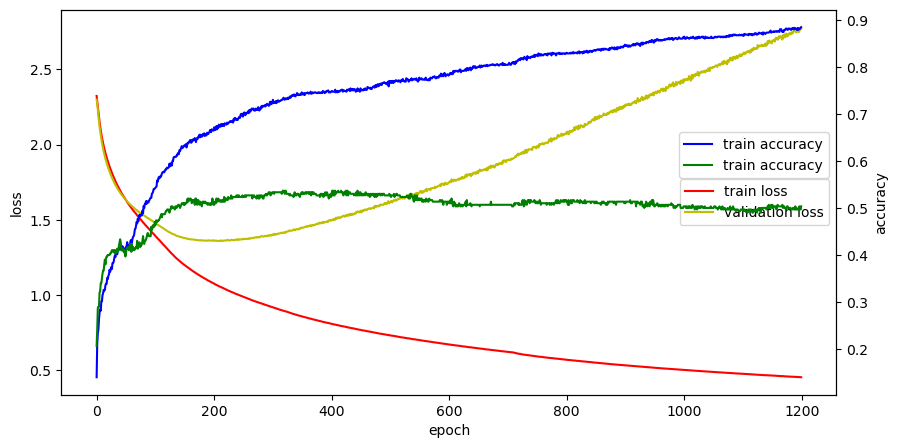

In [21]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수 1

In [22]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 ==0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'. format(self.epoch, 
                                                                               logs.get('loss'), 
                                                                               logs.get('accuracy'),
                                                                              logs.get('val_loss'),
                                                                              logs.get('val_accuracy')))
# 1번. 데이터 셋 준비하기
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)

# 훈련셋(6만개) = 5만개 + 1만개(val)
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나누기)
# 두 번 실행 X
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

# 훈련셋(5만)과 검증셋(1만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)  # 0부터 500미만의 무작위 수 3개
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]


# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)

# 2. 모델구성하기
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

# 3번 모델 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습(콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                validation_data=(X_val, Y_val),
                verbose=0,
                callbacks=[customHistory])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch : 50, loss : 1.5768866539001465, accuracy : 0.43714284896850586, val_loss : 1.640256404876709, val_accuracy : 0.39666667580604553
epoch : 100, loss : 1.3589354753494263, accuracy : 0.5014285445213318, val_loss : 1.5049234628677368, val_accuracy : 0.43666666746139526
epoch : 150, loss : 1.2260701656341553, accuracy : 0.5428571701049805, val_loss : 1.4445533752441406, val_accuracy : 0.4833333194255829
epoch : 200, loss : 1.1311264038085938,

## ※ 콜백함수2 - Early Stopping(조기종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [23]:
# 1번. 데이터 셋 준비하기
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
print(model.summary())

# 3. 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=30,# val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                              monitor='val_accuracy') # val_accuracy 가 연달아 2번이상 성능이 좋아지지 않으면 stop
#                                                      # Loss, accuracy, val_loss(기본값), val_accuracy
earlyStopping = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                epochs=1200,
                batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 1570      
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1200
7/7 [==============================] - 1s 31ms/step - loss: 2.2860 - accuracy: 0.1443 - val_loss: 2.2616 - val_accuracy: 0.2233
Epoch 2/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2433 - accuracy: 0.1600 - val_loss: 2.2095 - val_accuracy: 0.2200
Epoch 3/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.1917 - accuracy: 0.1714 - val_loss: 2.1603 - val_accuracy: 0.2367
Epoch 4/1200
7/7 [===

Epoch 54/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.5422 - accuracy: 0.3929 - val_loss: 1.5995 - val_accuracy: 0.3700
Epoch 55/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5353 - accuracy: 0.3943 - val_loss: 1.5946 - val_accuracy: 0.3667
Epoch 56/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5289 - accuracy: 0.3929 - val_loss: 1.5897 - val_accuracy: 0.3733
Epoch 57/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5231 - accuracy: 0.4086 - val_loss: 1.5817 - val_accuracy: 0.3833
Epoch 58/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.5150 - accuracy: 0.4071 - val_loss: 1.5779 - val_accuracy: 0.3933
Epoch 59/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5089 - accuracy: 0.4086 - val_loss: 1.5713 - val_accuracy: 0.3967
Epoch 60/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5021 - accuracy: 0.4100 - val_loss: 1.5651 - val_accuracy: 0.4000
Epoch 

Epoch 112/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.2661 - accuracy: 0.5714 - val_loss: 1.3891 - val_accuracy: 0.5200
Epoch 113/1200
7/7 [==============================] - 0s 29ms/step - loss: 1.2630 - accuracy: 0.5714 - val_loss: 1.3810 - val_accuracy: 0.5167
Epoch 114/1200
7/7 [==============================] - 0s 19ms/step - loss: 1.2601 - accuracy: 0.5714 - val_loss: 1.3827 - val_accuracy: 0.5200
Epoch 115/1200
7/7 [==============================] - 0s 18ms/step - loss: 1.2573 - accuracy: 0.5714 - val_loss: 1.3779 - val_accuracy: 0.5133
Epoch 116/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.2549 - accuracy: 0.5686 - val_loss: 1.3781 - val_accuracy: 0.5133
Epoch 117/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.2508 - accuracy: 0.5786 - val_loss: 1.3762 - val_accuracy: 0.5233
Epoch 118/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2480 - accuracy: 0.5714 - val_loss: 1.3744 - val_accuracy: 0.5233


7/7 [==============================] - 0s 11ms/step - loss: 1.0272 - accuracy: 0.6614 - val_loss: 1.2808 - val_accuracy: 0.5567
Epoch 227/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0260 - accuracy: 0.6657 - val_loss: 1.2758 - val_accuracy: 0.5367
Epoch 228/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0238 - accuracy: 0.6586 - val_loss: 1.2805 - val_accuracy: 0.5600
Epoch 229/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0228 - accuracy: 0.6614 - val_loss: 1.2785 - val_accuracy: 0.5600
Epoch 230/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0209 - accuracy: 0.6643 - val_loss: 1.2795 - val_accuracy: 0.5600
Epoch 231/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0200 - accuracy: 0.6657 - val_loss: 1.2782 - val_accuracy: 0.5567
Epoch 232/1200
7/7 [==============================] - 0s 18ms/step - loss: 1.0180 - accuracy: 0.6586 - val_loss: 1.2799 - val_accuracy: 0.5600
Epoch 233/1200


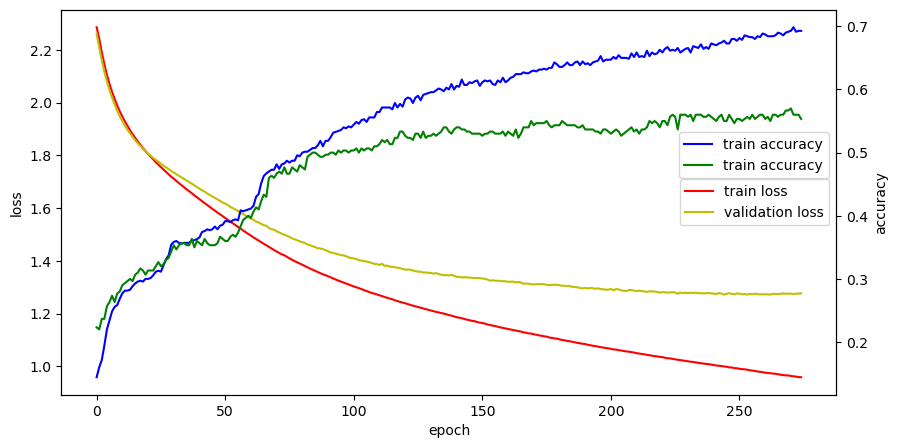

In [24]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

### 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보 (추가)
- 레이어 층 늘리기
- 활성화 함수 : 은닉층에 주로 relu계열 (elu ... )
- optimizer, epoch 등을 조정

In [ ]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%2 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# 데이터량을 줄인 것으로 아래를 주석처리하면 데이터 확보 가능
# train_idxs = np.random.choice(50000, 700)
# val_idxs = np.random.choice(10000, 300)

# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=64, activation='relu'))  # https://keras.io/api/layers/activations/
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
print(model.summary())

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=2)  # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop (monitor='val_loss' 기본값)
# earlyStopping = EarlyStopping(patience=2, 
#                               monitor='val_accuracy',  # val_accuracy 가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                               # 성급한 조기종료          # loss, accuracy, val_loss(기본값), val_accuracy
#                              )
earlyStopping = EarlyStopping(patience=20)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, 
                 epochs=1000, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 verbose=0,
                 callbacks=[earlyStopping, customHistory])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
None
epoch : 2, loss : 0.2046298235654831, accuracy : 0.9397600293159485, val_loss : 0.16852180659770966, val_accuracy : 0.9523000121116638
epoch : 4, loss : 0.1252811849117279, accuracy : 0.9621400237083435, val_loss : 0.14184026420116425, val_accuracy : 0.9587000012397766
epoch : 6, loss : 0.09011085331439972, 

In [ ]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [ ]:
# 모델 평가 
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss : ', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

## 6. 모델 저장
- 1. 학습된 모델 저장 : h5파일 (모델 로드시 추가 학습이 필요 x)
- 2. 모델 구성만 저장 : json파일 (모델 로드시 추가 학습이 필요 o)

In [ ]:
# 학습된 모델 저장
model.save('model/mnist.h5')

In [ ]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2=load_model('model/mnist.h5')
model2.summary()

In [ ]:
model2.evaluate(X_test, Y_test)

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0].reshape(28,28))
print(Y_test[0])
print(Y_test[0].argmax())
plt.show()

In [ ]:
# 모델 사용하기
X_test[0].shape

In [ ]:
result = model2.predict(X_test[0].reshape(1, 784))
print('실제값(원핫인코딩) : ', Y_test[0])
print('실제값 :', Y_test[0].argmax())
print('예측값(원핫인코딩) : ', [round(r, 7) for r in result[0]])
print('예측값 : ', result.argmax())

In [ ]:
# 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w') as f:
    f.write(model_json)

In [ ]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [ ]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

In [ ]:
model3.fit(X_train, Y_train, 
           epochs=100, 
           batch_size=500,
           validation_data=[X_val, Y_val],
           callbacks=[earlyStopping])

In [ ]:
model3.evaluate(X_test, Y_test)

In [ ]:
# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = load_model('model/mnist.h5')

In [ ]:
Y_test.argmax(axis=1)  # 실제값

In [ ]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

In [ ]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name='실제'
ctab.columns.name='예측'
ctab

In [ ]:
ctab.sum(axis=1)